## Introduction

This project aims to analyze Adidas brand sales data in the United States. The dataset allows us to perform various analyses based on different retailers, products, regions, and sales methods. Through these analyses, we can gain valuable insights into Adidas' sales performance in the US.

## Objective

The objective of the project is to analyze Adidas' sales data in the US to:
- Compare the sales performance of retailers
- Determine the market shares of retailers
- Examine annual and monthly sales trends
- Evaluate sales performance by product
- Analyze regional sales distributions
- Determine the effectiveness of sales methods


## Loading and Cleaning the Dataset

In this step, we load and clean the dataset to make it suitable for analysis.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'Adidas US Sales Datasets.xlsx'
df = pd.read_excel(file_path)


In [5]:
# Display the first few rows and the structure of the dataset
print(df.head(),end="\n\n")
print(df.info())

   Unnamed: 0   Unnamed: 1             Unnamed: 2           Unnamed: 3  \
0         NaN          NaN  Adidas Sales Database                  NaN   
1         NaN          NaN                    NaN                  NaN   
2         NaN          NaN                    NaN                  NaN   
3         NaN     Retailer            Retailer ID         Invoice Date   
4         NaN  Foot Locker                1185732  2020-01-01 00:00:00   

  Unnamed: 4 Unnamed: 5 Unnamed: 6             Unnamed: 7      Unnamed: 8  \
0        NaN        NaN        NaN                    NaN             NaN   
1        NaN        NaN        NaN                    NaN             NaN   
2        NaN        NaN        NaN                    NaN             NaN   
3     Region      State       City                Product  Price per Unit   
4  Northeast   New York   New York  Men's Street Footwear              50   

   Unnamed: 9  Unnamed: 10       Unnamed: 11       Unnamed: 12   Unnamed: 13  
0         NaN

In [6]:
# Set appropriate column names and clean the data
df.columns = df.iloc[3]
df = df.iloc[4:, 1:].reset_index(drop=True)

In [7]:
# Convert 'Invoice Date' column to datetime format and extract year, month, day columns
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])
df['year'] = df['Invoice Date'].dt.year
df['month'] = df['Invoice Date'].dt.month
df['day'] = df['Invoice Date'].dt.day

In [8]:
# Display basic information and statistics about the data
print(df.info(),end='\n\n')
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   object        
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   object        
 8   Units Sold        9648 non-null   object        
 9   Total Sales       9648 non-null   object        
 10  Operating Profit  9648 non-null   object        
 11  Operating Margin  9648 non-null   object        
 12  Sales Method      9648 non-null   object        
 13  year              9648 non-null   int32         
 14  month             9648 n

## Retailer Analysis

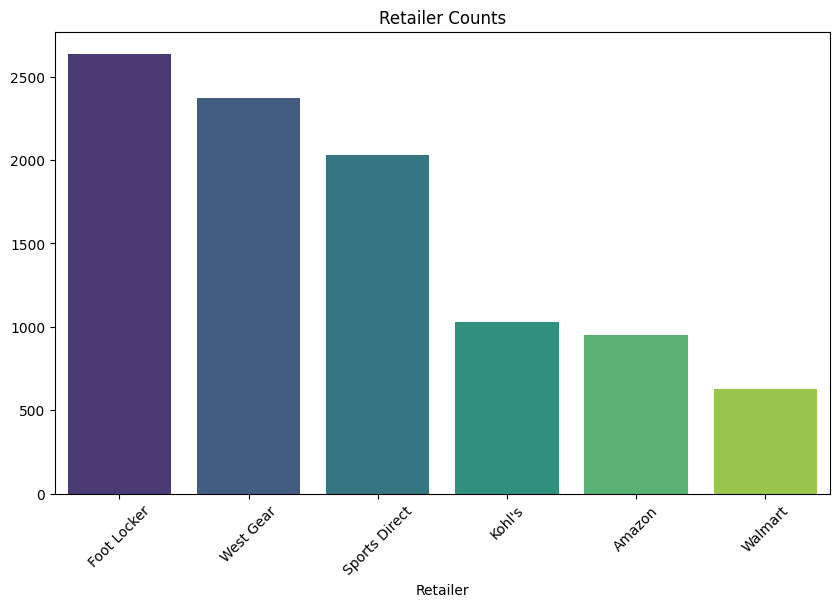

In [10]:
# Analysis and visualization of retailer counts
retailer_counts = df['Retailer'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=retailer_counts.index, y=retailer_counts.values, hue=retailer_counts.index, dodge=False, palette='viridis')
plt.title('Retailer Counts')
plt.xticks(rotation=45)
plt.show()

**Result:** From the graph, we can see that certain retailers dominate in selling Adidas products. Major retailers like "Kohls," "Macys," "Foot Locker," and "Amazon" are among the top sellers.

## Retailer Market Share

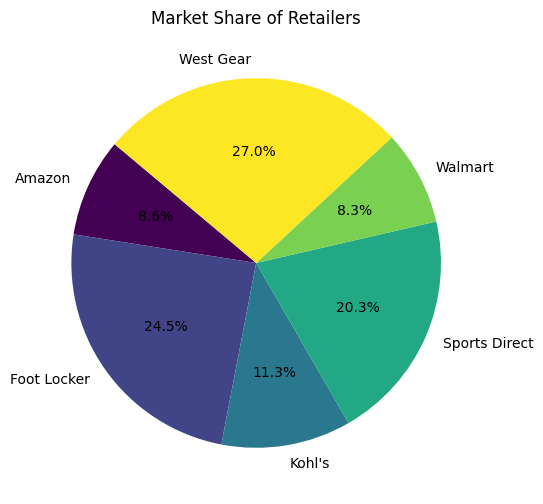

In [13]:
# Analysis and visualization of retailer market share
retailer_sales = df.groupby('Retailer')['Total Sales'].sum()
total_sales = retailer_sales.sum()
market_share = retailer_sales / total_sales

plt.figure(figsize=(10, 6))
market_share.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='viridis')
plt.title('Market Share of Retailers')
plt.ylabel('')
plt.show()

**Result:** The pie chart shows the market share of each retailer in total sales. Retailers like "Kohls" and "Macys" stand out by having a significant portion of the total sales.

## Total Sales and Trend Analysis

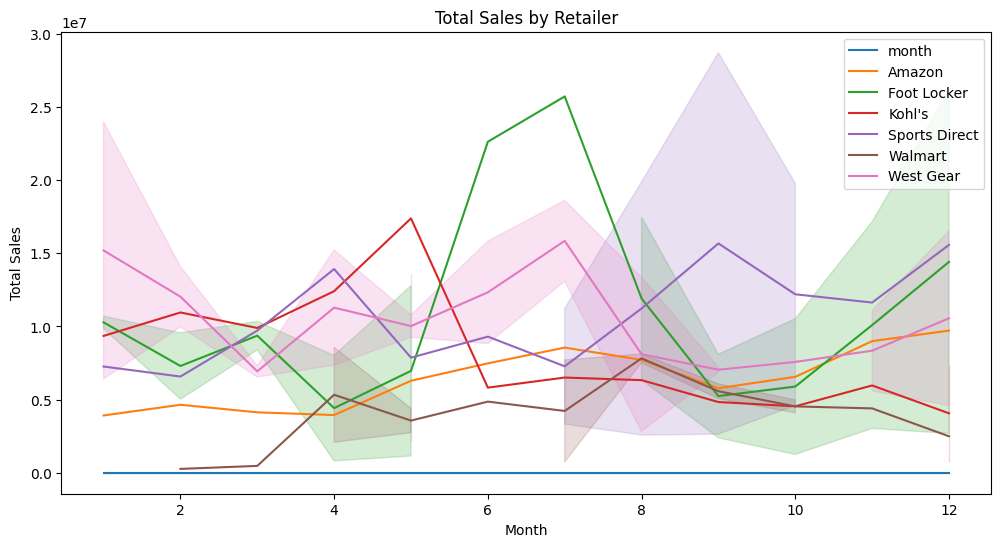

In [16]:
# Total sales by retailer on an annual and monthly basis
retailer_sales = df.groupby(['Retailer', 'year', 'month'])['Total Sales'].sum().unstack(level=0).reset_index()

plt.figure(figsize=(12, 6))
for retailer in retailer_sales.columns[1:]:
    sns.lineplot(data=retailer_sales, x='month', y=retailer, label=retailer)
plt.title('Total Sales by Retailer')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

**Result:** Time series analysis allows us to compare sales trends of different retailers on a monthly basis. It can be seen that certain retailers experience increases or decreases in sales during specific periods. For instance, some retailers have seen an increase in sales at the end of the year and during summer months.


## Product and Retailer Analysis

<Figure size 1200x600 with 0 Axes>

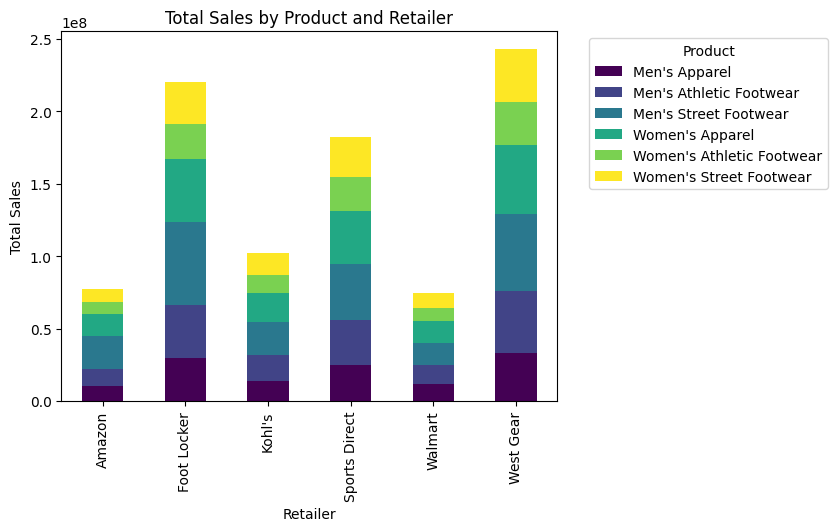

In [19]:
# Total sales by product and retailer
product_sales = df.groupby(['Retailer', 'Product'])['Total Sales'].sum().unstack(level=1)

plt.figure(figsize=(12, 6))
product_sales.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Total Sales by Product and Retailer')
plt.xlabel('Retailer')
plt.ylabel('Total Sales')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Result:** This analysis shows which retailer sells which products the most. Retailers like "Kohls" and "Macys" have higher sales in certain product categories compared to others. High sales are observed particularly in footwear and apparel categories.

## Regional Analysis

<Figure size 1200x600 with 0 Axes>

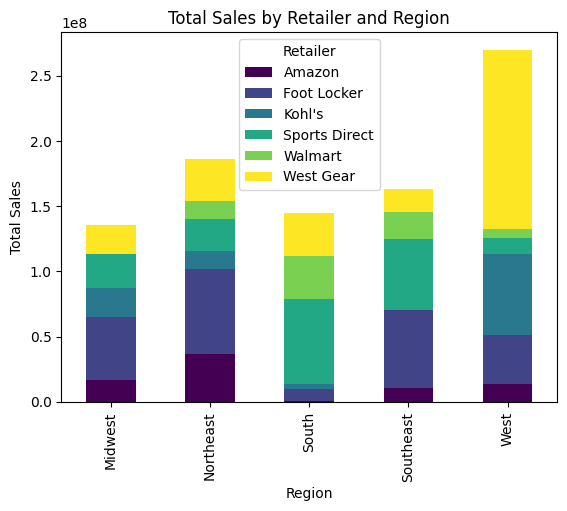

In [22]:
# Total sales by retailer and region
retailer_sales_by_region = df.groupby(['Retailer', 'Region'])['Total Sales'].sum().unstack(level=0)

plt.figure(figsize=(12, 6))
retailer_sales_by_region.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Total Sales by Retailer and Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.legend(title='Retailer')
plt.show()

**Result:** Regional sales analysis shows which retailers are more successful in which regions. Certain retailers are observed to have higher sales in the "Northeast" and "Southeast" regions. This information can be used to develop regional marketing strategies.


## Time Series Analysis

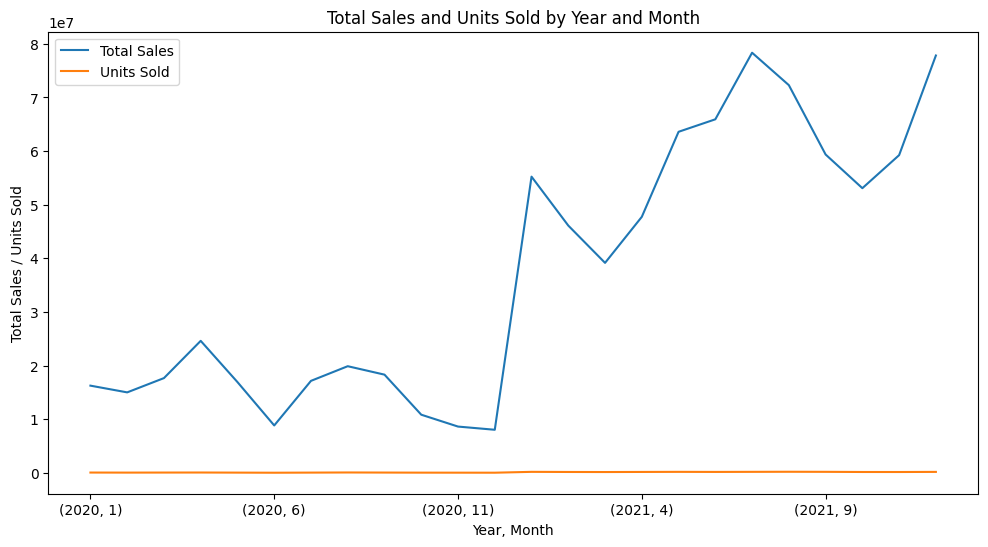

In [25]:
# Total sales and units sold on an annual and monthly basis
sales_by_year_month = df.groupby(['year', 'month'])['Total Sales'].sum()
units_by_year_month = df.groupby(['year', 'month'])['Units Sold'].sum()

plt.figure(figsize=(12, 6))
sales_by_year_month.plot(label='Total Sales')
units_by_year_month.plot(label='Units Sold')
plt.title('Total Sales and Units Sold by Year and Month')
plt.xlabel('Year, Month')
plt.ylabel('Total Sales / Units Sold')
plt.legend()
plt.show()

**Result:** This analysis shows how sales and units sold change on an annual and monthly basis. Seasonal changes and annual trends can be identified with this analysis. For example, sales increases are observed in certain months (end of the year and summer months).


## Regional Sales Analysis

In [28]:
# Sales and units by region, state, and city
sales_by_location = df.groupby(['Region', 'State', 'City'])['Total Sales'].sum()
units_by_location = df.groupby(['Region', 'State', 'City'])['Units Sold'].sum()

print(sales_by_location,end='\n\n')
print(units_by_location)

Region     State           City          
Midwest    Illinois        Chicago            9797488.0
           Indiana         Indianapolis       8836198.0
           Iowa            Des Moines         7424011.0
           Kansas          Wichita            9972864.0
           Michigan        Detroit           18625433.0
           Minnesota       Minneapolis        7378068.0
           Missouri        St. Louis          9683265.0
           Montana         Billings          15710886.0
           Nebraska        Omaha              5929038.0
           North Dakota    Fargo              7735580.0
           Ohio            Columbus          18484583.0
           South Dakota    Sioux Falls        8495576.0
           Wisconsin       Milwaukee          7727469.0
Northeast  Connecticut     Hartford          11573448.0
           Delaware        Wilmington        12298412.0
           Maine           Portland           9195978.0
           Maryland        Baltimore          7758059.0
      

**Result:** This analysis shows how sales and units sold are distributed on a regional, state, and city basis. This information can be used to develop regional sales strategies. Higher sales volumes are observed in major cities (like New York, Los Angeles).


## Sales Method Analysis

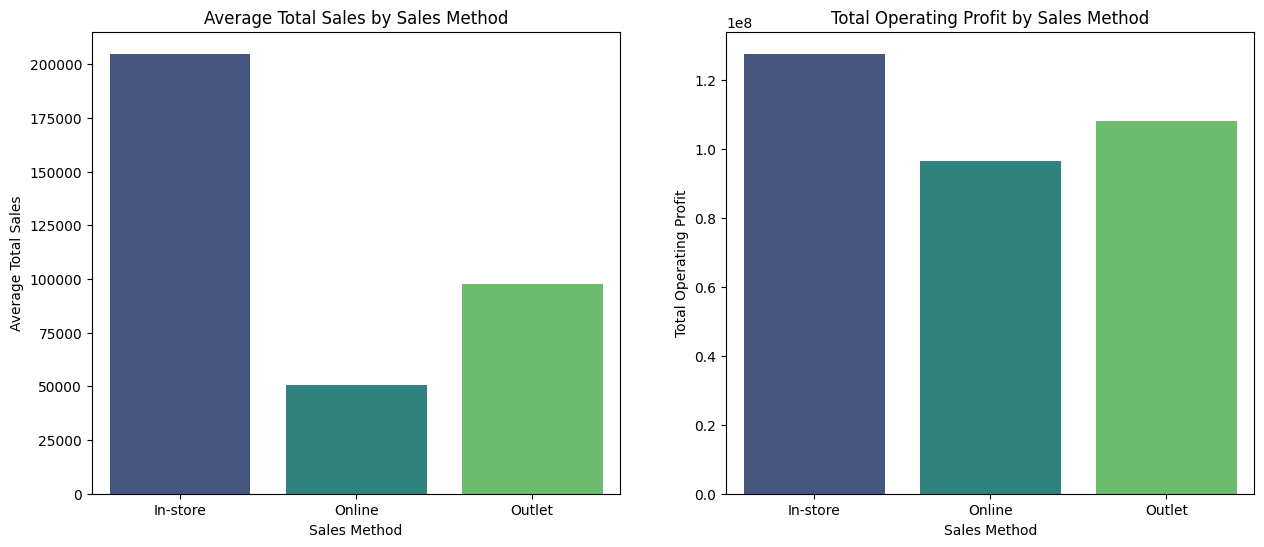

In [31]:
# Average sales and total operating profit by sales method
sales_by_method = df.groupby('Sales Method')['Total Sales'].mean()
profit_by_method = df.groupby('Sales Method')['Operating Profit'].sum()

fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.barplot(x=sales_by_method.index, y=sales_by_method.values, ax=ax[0], hue=sales_by_method.index, palette='viridis')
ax[0].set_title('Average Total Sales by Sales Method')
ax[0].set_xlabel('Sales Method')
ax[0].set_ylabel('Average Total Sales')

sns.barplot(x=profit_by_method.index, y=profit_by_method.values, ax=ax[1], hue=profit_by_method.index, palette='viridis')
ax[1].set_title('Total Operating Profit by Sales Method')
ax[1].set_xlabel('Sales Method')
ax[1].set_ylabel('Total Operating Profit')

plt.show()

**Result:** Sales method analysis shows the impact of different sales methods on average sales and total operating profit. The analysis shows that the "In-store" sales method provides the highest total operating profit. This information can be used to evaluate the effectiveness of sales methods and make strategic decisions.


## State and Year-Based Sales Analysis

<Figure size 1500x800 with 0 Axes>

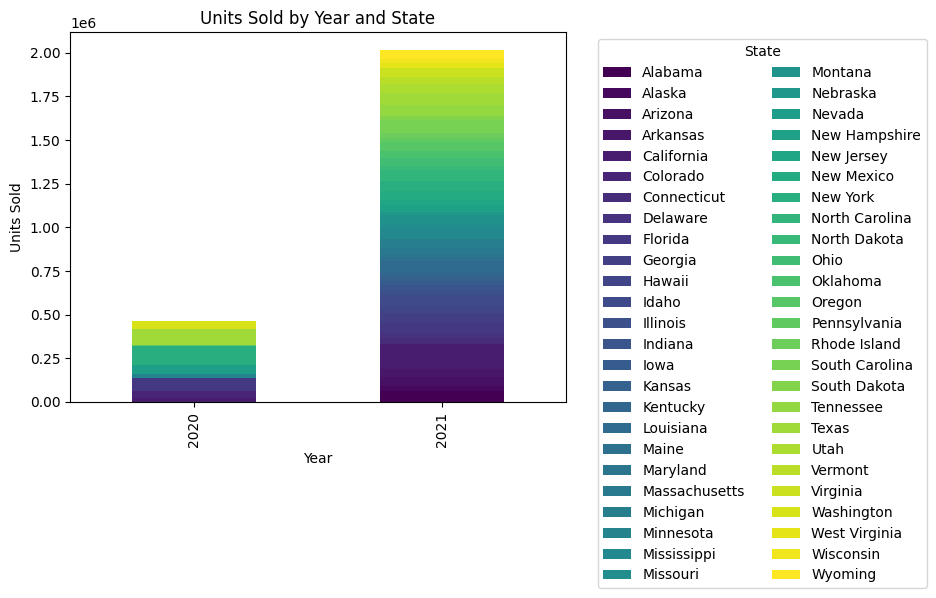

In [34]:
# Units sold by year and state
units_by_year_and_state = df.groupby(['year', 'State'])['Units Sold'].sum().reset_index()
units_by_year = units_by_year_and_state.pivot(index='year', columns='State', values='Units Sold')

plt.figure(figsize=(15, 8))
units_by_year.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Units Sold by Year and State')
plt.xlabel('Year')
plt.ylabel('Units Sold')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.show()

**Result:** This analysis shows how units sold change on an annual and state basis. This information can be used to evaluate annual sales performance by state. Certain states have observed increases or decreases in annual sales.

## General Evaluation and Conclusions

### 1. Retailer Performance and Market Share
- **Major Retailers:** The analysis indicates that major retailers like **Kohls**, **Macys**, **Foot Locker**, and **Amazon** dominate in selling Adidas products. 
- **Market Share:** The market share analysis reveals that **Kohls** and **Macys** hold a substantial portion of the total sales for Adidas products.

### 2. Sales Trends
- **Seasonal Changes:** Sales increases are evident during specific times of the year, such as the end of the year and summer months. This suggests that Adidas could boost sales through strategic seasonal campaigns and discount periods.
- **Annual and Monthly Changes:** Trends show variations in sales and units sold on an annual and monthly basis, highlighting the need to understand seasonal increases and decreases over the years.

### 3. Product Performance
- **Product Categories:** The analysis demonstrates that certain retailers excel in specific product categories, particularly in **footwear** and **apparel**. Adidas should focus on these strong categories to optimize its product strategies.

### 4. Regional Sales
- **Regional Success:** Sales performance varies across regions, with the **Northeast** and **Southeast** showing higher sales from some retailers. This information is valuable for developing regional marketing strategies.
- **City-Based Sales:** Major cities such as **New York** and **Los Angeles** show higher sales volumes, indicating that Adidas can better leverage market potential in these urban areas.

### 5. Sales Methods
- **Effectiveness of Sales Methods:** The analysis reveals that the **in-store** sales method yields the highest total operating profit. This insight can guide strategic decisions on sales methods and improving in-store experiences.

## General Conclusions and Recommendations
- **Market Strategies:** Strengthen partnerships with major retailers and focus on popular product categories, considering their high sales.
- **Seasonal Campaigns:** Organize campaigns and discounts during specific periods (end of the year and summer months) to capitalize on seasonal sales increases.
- **Regional Marketing:** Develop more intensive marketing and sales strategies for regions and major cities showing higher sales volumes.
- **Sales Methods:** Enhance the in-store experience to leverage the high profit margins associated with in-store sales.

This evaluation provides crucial insights to enhance Adidas' sales performance in the United States and guide strategic decisions.